In [5]:
#import neccessary modules
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#change the style
plt.style.use('fivethirtyeight')

### Load the dataset

In [7]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


### Discard the cryptocurrencies without a market capitalization

In [8]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### How big is Bitcoin compared with the rest of the cryptocurrencies?

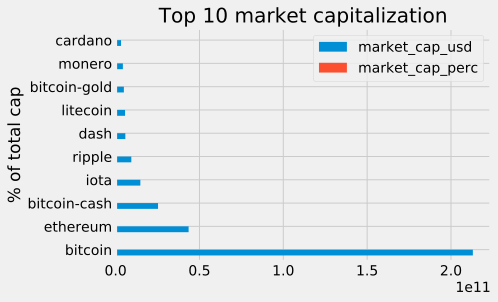

In [9]:
#Declaring these now for later use in the plots
title = 'Top 10 market capitalization'
ylabel = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc=lambda x: x.market_cap_usd/cap.market_cap_usd.sum()*100)

# Plotting the barplot with the title defined above 
ax = cap10.plot(kind='barh')

# Annotating the y axis with the label defined above
plt.title(title)
plt.ylabel(ylabel)
plt.show()

### Making the plot easier to read and more informative¶

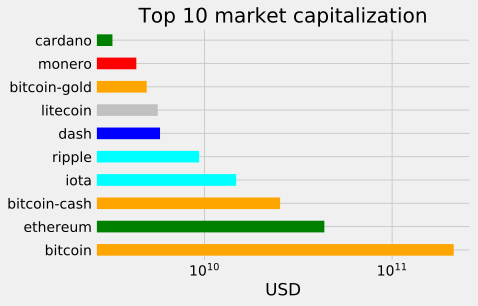

In [16]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the x-axis  
ax = cap10.market_cap_usd.plot.barh(title=title, logx=True, color = COLORS)

# Annotating the y axis with log(USD)
ax.set_xlabel('USD')

# Final touch! Removing the xlabel as it is not very informative
ax.set_ylabel('')
plt.show()

### Volatility in cryptocurrencies

In [17]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
display(volatility.head())

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


### We can see that things are a bit crazy

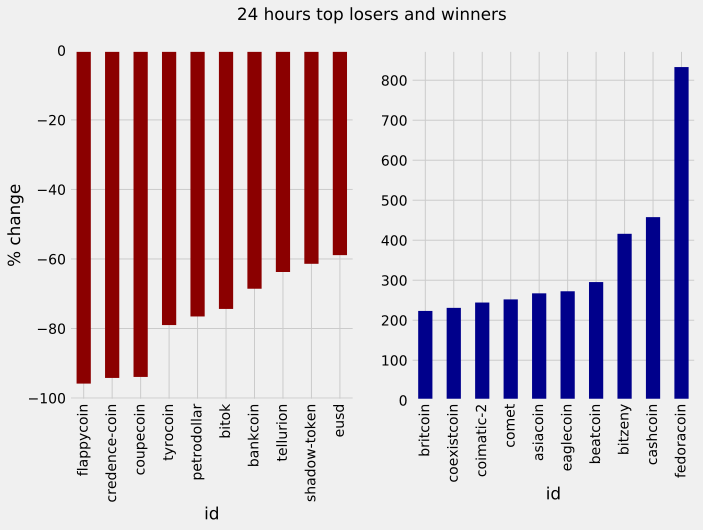

In [18]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

### Let's check the weekly Series too

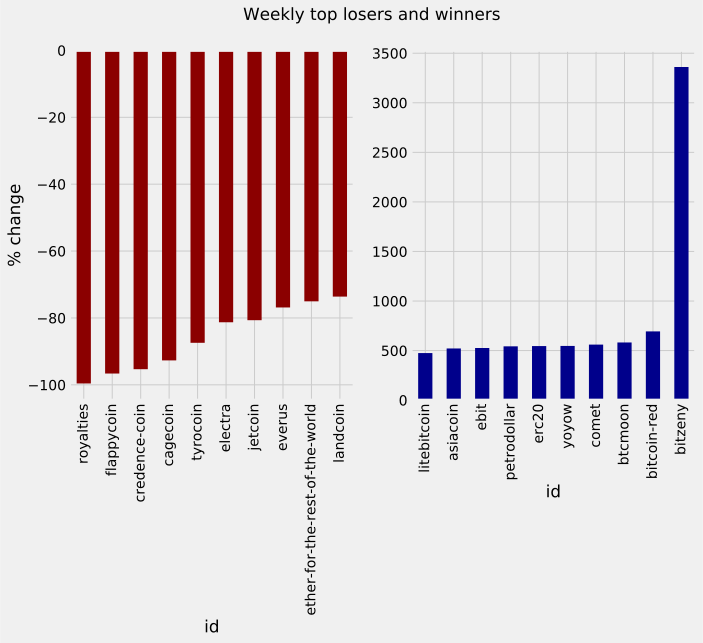

In [19]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

### How small is small?

In [20]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
display(largecaps)

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


### Most coins are tiny

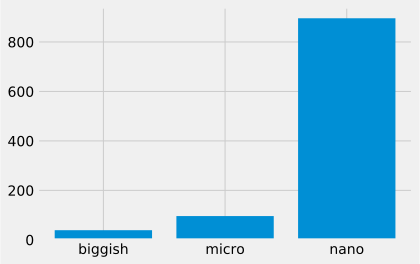

In [22]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()